In [2]:
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import re

In [35]:
def draw_consistency():
    train_interval = 1
    test_interval = 500
    # read
    filename = '/Users/zhirong/Dropbox/lemniscate_resnet18_flip.log'
    with open(filename, 'r') as f:
        file_data = f.read()
    train_loss1 = re.findall(r'Loss (\w*\.\w*)', file_data)
    train_loss = np.array(train_loss1, np.float32)
    train_loss = train_loss[499::500]
    
    test_acc = re.findall(r'Top1: (\w*\.\w*)', file_data)
    test_acc = np.array(test_acc, np.float32)
    test_acc = test_acc[195::196]
    
    #filename = '/Users/zhirong/Dropbox/4096_200'
    #with open(filename, 'r') as f:
    #    file_data = f.read()
    #train_loss2 = re.findall(r'Err (\w*\.\w*)', file_data)
    #train_loss2 = np.array(train_loss2, np.float32)
    #train_loss2 = train_loss2 - 0.22
    
    #train_loss = np.hstack((train_loss1, train_loss2))
    #train_loss = train_loss[::1000]
    
    
    # plot loss
    ax = plt.gca()
    ax.plot(np.arange(0,len(train_loss),1),train_loss,\
             color='black', linewidth=3.0, linestyle="-", label='our training loss')

    # set properties
    
    ax.set_xlabel('Training Epochs', fontsize=25)
    ax.set_ylabel('Training Loss', fontsize=25)
    for label in ax.get_xticklabels() + ax.get_yticklabels():
        label.set_fontsize(16)
        label.set_bbox(dict(facecolor='white', edgecolor='None'))
    
    # plot accuracy
    ax2 = ax.twinx()
    test_epoch = np.arange(0, len(test_acc), 1)
    #test_acc = np.array([18.4, 28.9,35.2, 36.4, 36.2, 38.2, 39.5])
    print(test_acc)
    ax2.plot(test_epoch,test_acc*1.3,\
             color='red', linewidth=3.0, linestyle="-", label='our testing accuracy')
    
    # set properties
    ax2.set_ylabel('Testing Accuracy', fontsize=25)
    for label in ax2.get_yticklabels():
        label.set_fontsize(16)
        label.set_bbox(dict(facecolor='white', edgecolor='None' ))
    
    ax.set_title('Consistency of training and testing objectives', fontsize=25)
    
    
    ax.grid()
    #ax2.grid()
    
    ax.set_xlim(0,200)

[  0.14         0.18000001   0.31999999   0.51999998   1.42999995
   3.24000001   4.46999979   5.51000023   6.57000017   7.73000002
   8.10000038   9.14000034   9.82999992  10.31000042  10.89000034
  11.89999962  12.78999996  13.10999966  13.75        14.34000015
  14.23999977  15.43999958  15.42000008  15.93000031  16.95999908
  17.06999969  17.28000069  16.51000023  18.18000031  18.54999924
  18.79000092  19.37000084  19.38999939  20.37999916  19.67000008
  20.54000092  20.93000031  20.52000046  21.23999977  21.56999969
  21.52000046  21.62999916  21.79999924  22.5         22.60000038
  22.90999985  22.79000092  22.98999977  23.36000061  23.20000076
  23.79999924  23.77000046  23.96999931  23.82999992  24.12999916
  23.76000023  24.68000031  24.54999924  24.90999985  24.70999908
  24.79000092  24.79999924  24.93000031  25.46999931  24.88999939
  25.22999954  25.06999969  25.36000061  25.15999985  25.70000076
  25.22999954  25.70000076  25.62999916  26.01000023  26.20000076
  26.06999

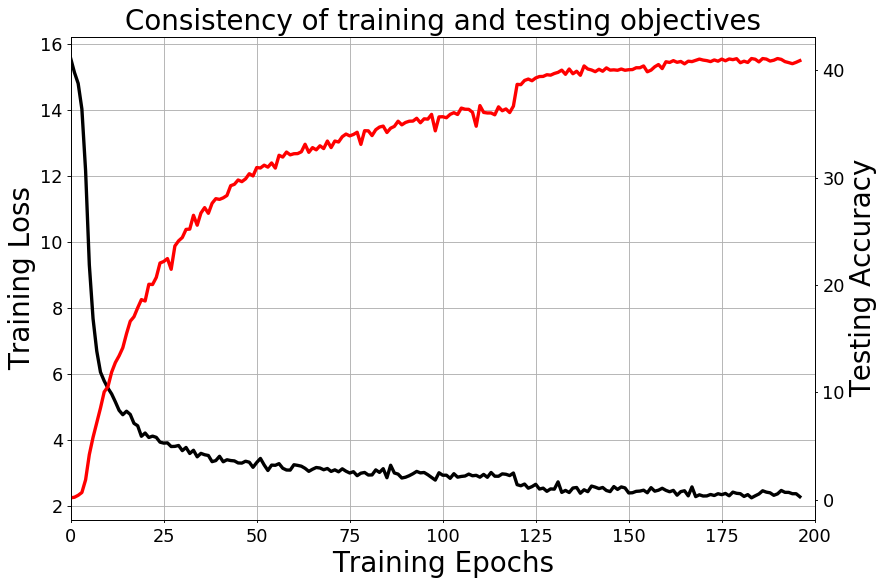

In [36]:
plt.figure(figsize=(12,8), dpi=80)
draw_consistency()

plt.savefig('consistency_new.pdf',dpi=80,bbox_inches='tight')